In [1]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from importlib import reload
from kmeans import *
from tf_idf import *
from data import *
import pandas as pd
import numpy as np
from rfm import *
from graph import *
from evaluation import *

In [2]:
df = load_data()

In [3]:
stock_rfm = rfm(df)
stock_rfm.head(10)

,CustomerID,Frequency,Recency,Amount,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,cate_7,cate_8,cate_9
0,17850,34,372,5391.21,118.80,2370.11,101.76,0.00,0.0,0.0,413.58,2386.96,0.0
1,13047,9,56,3232.59,21.00,2623.36,0.00,239.55,0.0,0.0,0.00,348.68,0.0
2,12583,15,2,6705.38,68.00,6561.54,60.84,0.00,0.0,0.0,0.00,15.00,0.0
3,13748,5,95,948.25,0.00,933.25,0.00,0.00,0.0,0.0,0.00,15.00,0.0
4,15100,3,333,876.00,0.00,876.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0
5,15291,14,25,4623.30,0.00,3392.06,0.00,347.50,0.0,0.0,13.00,870.74,0.0
6,14688,21,7,5579.10,0.82,4739.28,0.00,220.00,0.0,0.0,179.18,439.82,0.0
7,17809,12,16,5411.91,3.15,4698.36,0.00,270.00,0.0,0.0,0.00,440.40,0.0
8,15311,91,0,60632.75,1138.20,45359.89,576.27,1911.58,0.0,0.0,2313.24,9333.57,0.0
9,16098,7,87,2005.63,16.15,1944.96,0.00,0.00,0.0,0.0,0.00,44.52,0.0


In [4]:
matrix = rfm_matrix(stock_rfm)
sse, sscore, test_range = kmeans(matrix)

Clusters = 2 ,Silhouette Score = 0.69591
Clusters = 3 ,Silhouette Score = 0.60285
Clusters = 4 ,Silhouette Score = 0.489
Clusters = 5 ,Silhouette Score = 0.50738
Clusters = 6 ,Silhouette Score = 0.49057
Clusters = 7 ,Silhouette Score = 0.4571
Clusters = 8 ,Silhouette Score = 0.46704
Clusters = 9 ,Silhouette Score = 0.48655
Clusters = 10 ,Silhouette Score = 0.47635
Clusters = 11 ,Silhouette Score = 0.39372
Clusters = 12 ,Silhouette Score = 0.42673
Clusters = 13 ,Silhouette Score = 0.40042
Clusters = 14 ,Silhouette Score = 0.40173


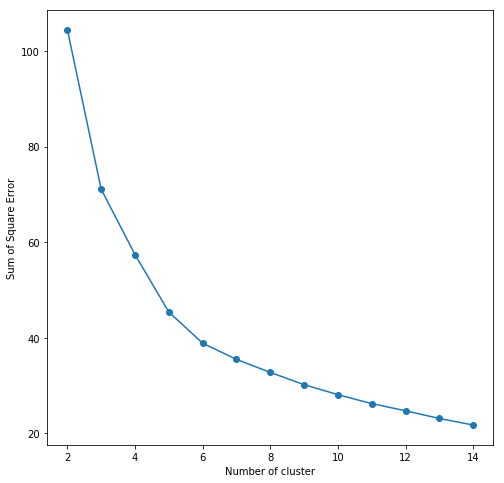

In [5]:
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

In [6]:
clusters = kmeans(matrix = matrix, cluster_num = 5, score = sscore[5] )
len(clusters)

4322

In [7]:
stock_rfm = rfm_write_back(stock_rfm,clusters) 
stock_rfm.head(10)

,CustomerID,Frequency,Recency,Amount,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,cate_7,cate_8,cate_9,Group
0,17850,34,372,5391.21,118.80,2370.11,101.76,0.00,0.0,0.0,413.58,2386.96,0.0,3
1,13047,9,56,3232.59,21.00,2623.36,0.00,239.55,0.0,0.0,0.00,348.68,0.0,0
2,12583,15,2,6705.38,68.00,6561.54,60.84,0.00,0.0,0.0,0.00,15.00,0.0,2
3,13748,5,95,948.25,0.00,933.25,0.00,0.00,0.0,0.0,0.00,15.00,0.0,0
4,15100,3,333,876.00,0.00,876.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,3
5,15291,14,25,4623.30,0.00,3392.06,0.00,347.50,0.0,0.0,13.00,870.74,0.0,2
6,14688,21,7,5579.10,0.82,4739.28,0.00,220.00,0.0,0.0,179.18,439.82,0.0,2
7,17809,12,16,5411.91,3.15,4698.36,0.00,270.00,0.0,0.0,0.00,440.40,0.0,2
8,15311,91,0,60632.75,1138.20,45359.89,576.27,1911.58,0.0,0.0,2313.24,9333.57,0.0,4
9,16098,7,87,2005.63,16.15,1944.96,0.00,0.00,0.0,0.0,0.00,44.52,0.0,0


In [8]:
stock_rfm.groupby('Group', as_index = False)['CustomerID'].count()
stock_rfm.rename(columns={'Group': 'Cluster'}, inplace=True)

,Group,CustomerID
0,0,617
1,1,2098
2,2,498
3,3,1091
4,4,18


In [10]:
n_attributes = len(stock_rfm.columns) - 5
customer_clustering = df_for_chart(stock_rfm, n_attributes)
display(customer_clustering)

,Sum $,Med. $,Size,Med. Visit,Median $ per Visit,cate_1,cate_1 mean,cate_1 std,cate_2,cate_2 mean,...,cate_6 std,cate_7,cate_7 mean,cate_7 std,cate_8,cate_8 mean,cate_8 std,cate_9,cate_9 mean,cate_9 std
Cluster,,,,,,,,,,,,,,,,,,,,,
3,196724.20,261.490,498,1.0,224.430000,1.322994,5.226205,19.205885,77.804541,307.350120,...,1.058157,2.333983,9.219900,49.298194,13.295594,52.521386,144.918174,0.449945,1.777410,14.816192
0,1060946.37,622.130,1076,2.0,308.825500,1.179439,11.629387,51.375815,81.207458,800.713364,...,4.320540,1.337085,13.183783,54.462911,11.814518,116.492286,203.930653,0.228009,2.248188,23.252872
2,4955801.37,1133.250,2115,4.0,298.286667,1.217955,28.538742,151.450858,81.939445,1919.979262,...,54.385860,1.670065,39.132426,219.232148,11.384166,266.750194,587.907289,0.207907,4.871603,34.505270
4,1523046.07,56289.165,18,55.5,1035.876106,0.656174,555.212778,540.604337,77.930099,65939.517222,...,71.086499,2.208105,1868.358889,2929.859386,13.402513,11340.357778,4868.607722,0.215271,182.148889,322.866732
1,387442.64,347.870,615,1.0,234.385000,1.567646,9.875984,49.954527,79.193005,498.906455,...,20.206641,1.593743,10.040390,37.764844,12.153812,76.567561,262.314410,0.435941,2.746374,23.504497


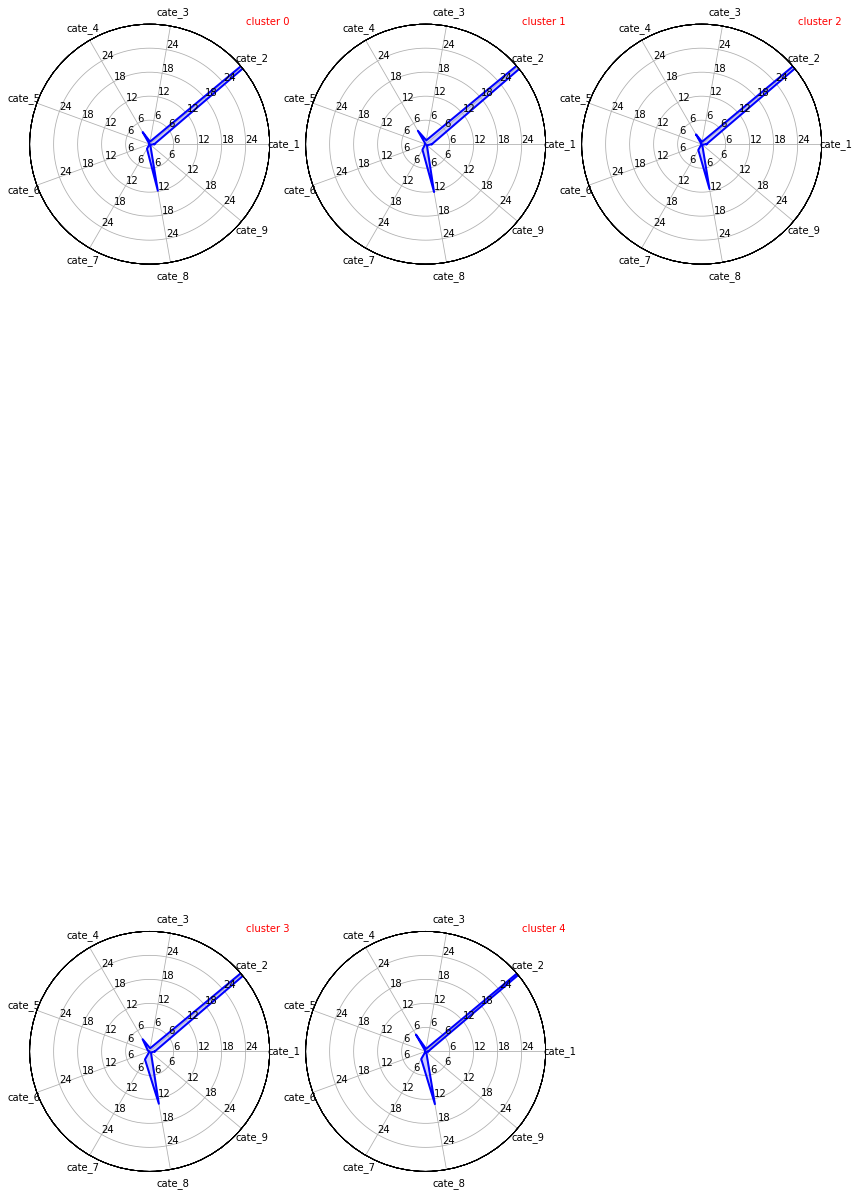

In [11]:
n_clusters = len(customer_clustering.index)
radar_chart(customer_clustering, n_clusters, n_attributes)

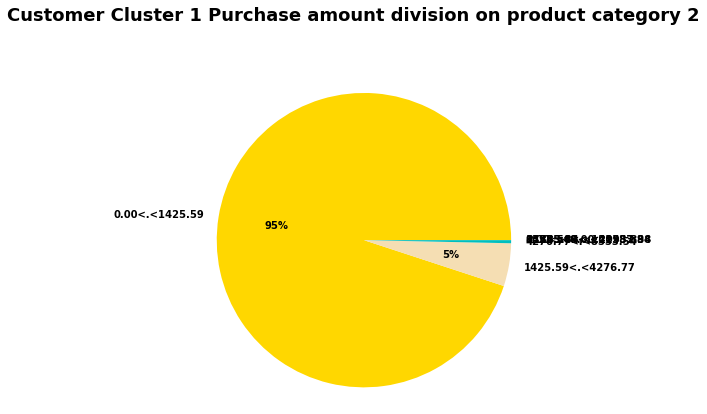

In [12]:
pie_chart(stock_rfm, 1, 2)